In [6]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("..")

import regrank as rr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
g = rr.datasets.us_air_traffic()
# g = sr.datasets.at_migrations()
# g = sr.datasets.parakeet()
print(g)

<Graph object, directed, with 2278 vertices and 6390340 edges, 11 internal vertex properties, 18 internal edge properties, 5 internal graph properties, at 0x756aeef29c50>


In [3]:
g.list_properties()

name                      (graph)   (type: string, val: us_air_traffic)
description               (graph)   (type: string, val: Yearly snapshots of
                                                        flights among all
                                                        commercial airports in
                                                        the United States from
                                                        1990 to today. Metadata
                                                        include passengers,
                                                        distance, carrier,
                                                        airport located city,
                                                        state, and month of the
                                                        flight.)
citation                  (graph)   (type: string, val: ['Bureau of
                                                        Transportation
                           

In [6]:
model = rr.SpringRank(method="annotated")
result = model.fit(g, alpha=1, lambd=0.5, goi="state_abr")

Iter.  Objective Stepsize
-----  --------- --------
    0  -3.17e+06  1.00e+00
   31  -3.17e+06  4.11e+00
==  Quitting due to stagnating objective value  ==


In [7]:
summary = model.compute_summary(g, "state_abr", primal_s=result["primal"])

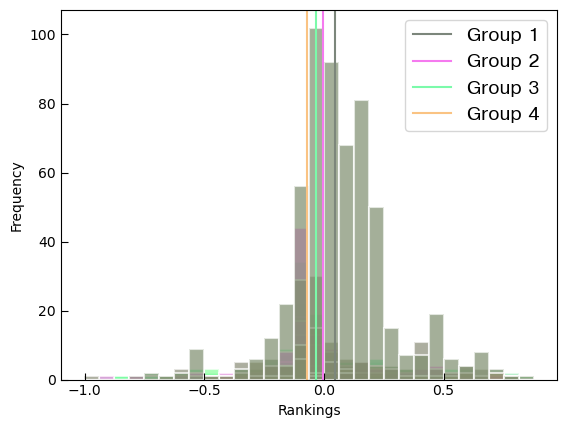

In [8]:
rr.plot_hist(summary, saveto="us_air_traffic_hist.png")

In [9]:
rr.print_summary_table(summary, max_width=40)

+-------+-------+--------+-----------------------------------------+--------+---------+
| Group | #Tags | #Nodes | Members                                 |   Mean |     Std |
+-------+-------+--------+-----------------------------------------+--------+---------+
| 1     |     5 |    825 | CA, WA, OR, TT, AK                      |  0.047 | 1.1e-02 |
| 2     |     4 |    206 | TX, MT, PA, ID                          | -0.006 | 4.2e-03 |
| 3     |    43 |   1243 | MI, IN, TN, NC, VA, IL, CO, NH, CT, NY, | -0.035 | 4.3e-03 |
|       |       |        | FL, MA, ME, UT, PR, NM, MN, MD, NE, AL, |        |         |
|       |       |        | HI, KY, MO, LA, MS, SD, IA, GA, AR, ND, |        |         |
|       |       |        | NV, RI, OH, NJ, WV, OK, DE, WI, VT, AZ, |        |         |
|       |       |        | SC, KS, WY                              |        |         |
| 4     |     1 |      4 | VI                                      | -0.072 | 0.0e+00 |
+-------+-------+--------+------